In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

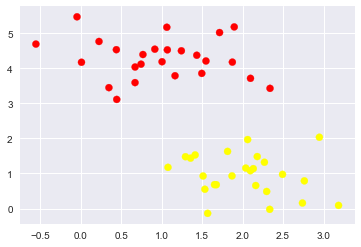

In [5]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                 random_state = 0,
                 cluster_std = 0.60)
plt.scatter(X[:,0], X[:,1],
           c=y, s =50, cmap='autumn')

In [7]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

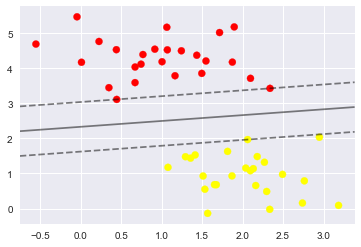

In [12]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [14]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

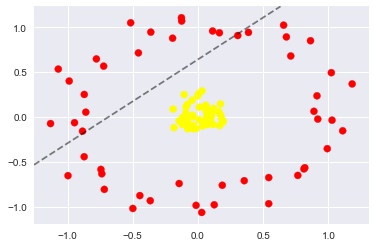

In [16]:
# kernel SVM

from sklearn.datasets.samples_generator import make_circles
X,y = make_circles(100, factor=0.1, noise=0.1)

clf = SVC(kernel = 'linear').fit(X, y)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [19]:
r = np.exp(-(X**2).sum(1))

In [24]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev = 30, azim = 30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1], r, c=y, s=50, cmpa='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90,90], azip=(-180,180),
        x = fixed(X), y = fixed(y))

TraitError: Invalid selection: value not found

In [26]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X,y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

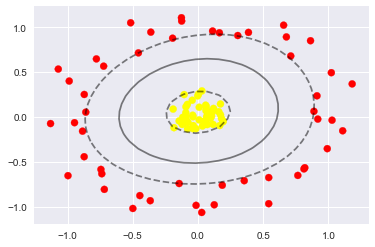

In [28]:
plt.scatter(X[:,0],X[:,1], c=y, s=50,
           cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],
           clf.support_vectors_[:,1],
           s=300, lw=1, facecolors='none');

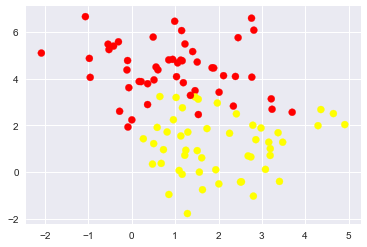

In [30]:
# Soft margins

X, y = make_blobs(n_samples=100, centers=2,
                 random_state=0, cluster_std=1.2)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

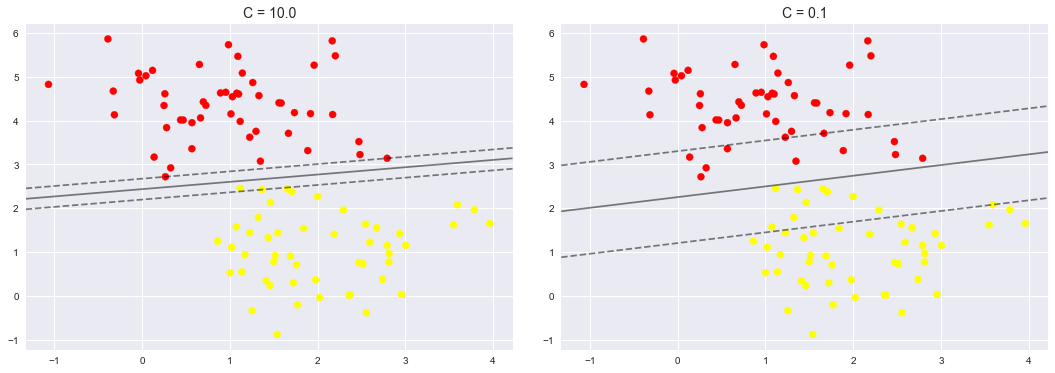

In [31]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)